# Machine Learning


The art and science of computers the ability to learn to make decisions from data.

![](ml.JPG)

Three categories of ML:

### 1. Supervised learning: 
    Uses labeled data
    

### 2. Unsupervised learning: 
    Uses unlabeled data

### 3. Reinforcement learning: 
    Software agents interact with an environment, Learn how to optimize their behavior, Given a system of rewards and punishments

## 1. Supervised learning

### 1.1. Supervised learning: Classification

- Automate time-consuming or expensive manual tasks

- Make predictions about the future

- Need labeled data

- ML libraries:

    - sklearn
    - TensorFlow
    - keras
    - NLTK
    - Spacy...etc

### Exploratory data analysis (EDA)

- Before thinking about what supervised learning models to apply we need to perform Exploratory data analysis (EDA) in order to understand the structure of the data.

- EDA helps us to explore the data
- common EDA's:
    - head()
    - tail()
    - info()
    - describe()

- Helps us to determine :

    - Data Quality
    - If any missing values
    - correct Data Types
    - correct data formats 
    - data distribution ..etc
    
#### The Iris dataset in scikit-learn

In [183]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

__iris datatype is bunch = key value pair__

In [184]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [185]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [186]:
iris.data.shape

(150, 4)

In [187]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [188]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [189]:
dfx = pd.DataFrame(iris.data)
dfx.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Visual EDA

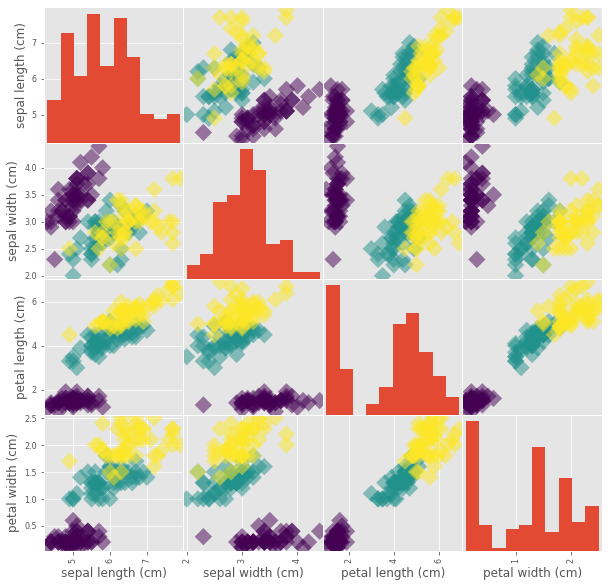

In [190]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [10, 10],
s=150, marker = 'D')

### The classifcation challenge

Choose a classifier

#### e.g k-Nearest Neighbors Iris Data set

- Basic idea: Predict the label of a data point by:

    - Looking at the ‘k’ closest labeled data points
    - Taking a majority vote

Further questions:

- what's the optimal K?  

__To find optimal K:__ 

    - sketch Model complexity curve
    - Grid search 


### fit and predict

All machine learning models implemented as Python classes

- Training a model on the data = ‘fitting’ a model to the data
`.fit()` method

- To predict the labels of new data: 
`.predict()` method

In [191]:
from sklearn.model_selection import train_test_split
X = iris['data']
y= iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

__X = iris['data']__

is Data

will be split into X_train, X_test

__y= iris['target']__

is lebel

will be split into y_train, y_test


Steps:

1. `.fit()`  : Train the model with X_train (training Data), y_train(lebel for the tarinig data)

2. `.predict()` : 

    - predict lebels for unseen Data
    - using X_test predict lebels y_pred
    
3. evaluate/Validate:

    - compare predicted lebels with y_test (held out set of lebel data)
    - compare y_test with y_pred, this is __validation!__

In [192]:
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [193]:
print("Test set predictions: \n", y_pred)

Test set predictions: 
 [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [194]:
knn.score(X_test, y_test)

0.9555555555555556

#### k-Nearest Neighbors Model complexity

- Larger k = smoother decision boundary = less complex model = can lead to under fitting
- Smaller k = more complex model = can lead to overftting

#### Model Complexity Curve: what's the optimal K?

In [195]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [196]:

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

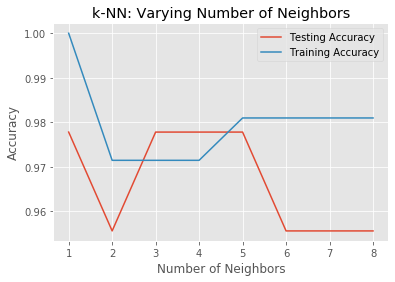

In [197]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### e.g MNIST digits recognition dataset 

In [198]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping 

In [199]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


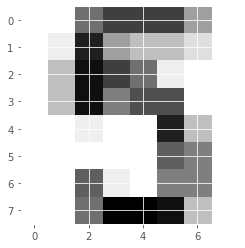

In [200]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [201]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


### What is the optimal K?

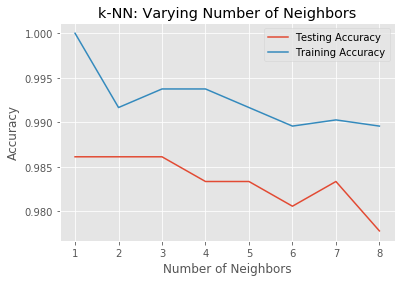

In [202]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### 1.2 Supervised learning: Regression

Regression is a form of Supervised machine learning where the target variable is a __continuous variable__.


e.g predicting the average temperature of a given area at a given hour / day of the year. 

In [224]:
# Import numpy and pandas
import numpy as np
import pandas as pd

In [225]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminderr.csv')
df

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059,2.73,0.10,3.328945,24.59620,12314,129.9049,75.3,29.5
1,19842251,6.43,2.00,1.474353,22.25083,7103,130.1247,58.3,192.0
2,40381860,2.24,0.50,4.785170,27.50170,14646,118.8915,75.5,15.4
3,2975029,1.40,0.10,1.804106,25.35542,7383,132.8108,75.2,20.0
4,21370348,1.96,0.10,18.016313,27.56373,41312,117.3755,81.5,5.2
5,8331465,1.41,0.30,8.183160,26.46741,43952,124.1394,80.4,4.6
6,8868713,1.99,0.10,5.109538,25.65117,14365,128.6024,70.6,43.3
7,348587,1.89,3.10,3.131921,27.24594,24373,124.3862,72.2,14.5
8,148252473,2.38,0.06,0.319161,20.39742,2265,125.0307,68.4,55.9
9,277315,1.83,1.30,6.008279,26.38439,16075,126.3940,75.3,15.4


In [205]:
df.keys()

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life ', 'child_mortality'],
      dtype='object')

In [226]:
# Create arrays for features and target variable
y = df['life '].values
X = df['fertility'].values

In [207]:
print(X)

[2.73 6.43 2.24 1.4  1.96 1.41 1.99 1.89 2.38 1.83 1.42]


In [208]:
print(y)

[75.3 58.3 75.5 75.2 81.5 80.4 70.6 72.2 68.4 75.3 70.1]


In [227]:
# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (11,)
Dimensions of X before reshaping: (11,)


In [228]:
# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y after reshaping: (11, 1)
Dimensions of X after reshaping: (11, 1)


In [211]:
print(X)

[[2.73]
 [6.43]
 [2.24]
 [1.4 ]
 [1.96]
 [1.41]
 [1.99]
 [1.89]
 [2.38]
 [1.83]
 [1.42]]


In [212]:
print(y)

[[75.3]
 [58.3]
 [75.5]
 [75.2]
 [81.5]
 [80.4]
 [70.6]
 [72.2]
 [68.4]
 [75.3]
 [70.1]]


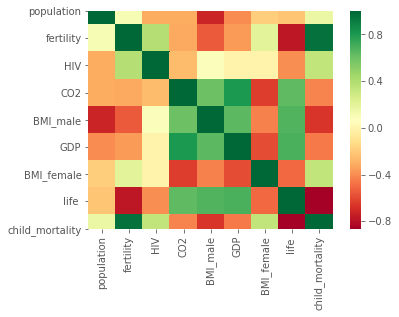

In [229]:
import seaborn as sns
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

0.5901793611118565


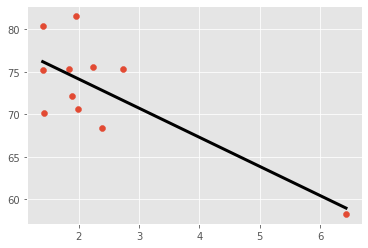

In [230]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

# Fit the model to the data
reg.fit(X,y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X, y))

# Plot regression line
plt.scatter(X,y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


In [215]:
#prediction_space

In [232]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -0.33521032178246113
Root Mean Squared Error: 10.736443107418456


### K-fold Cross Validation

In [233]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)


[ 0.49873983 -2.23111109  0.33780033 -4.01932946 -2.58160169]


In [234]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: -1.599100415702767


### CV comparison

In [236]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_2 = cross_val_score(reg, X, y, cv=2)
print(np.mean(cvscores_2))

# Perform 10-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

-3.5024724671720007
-0.786714433855909


As we can see the higher the fold, we see a different score!

### Regularized Regression


As we can remeber liner regression minimizes loss function i.e it chooses ai coeffifients for each feature variable x.


Large coefficients lead to __overfitting!__

Regularization is the __process of penalizing__ large coefficinets! 


Examples of Regularized Regression are:

__1. Ridge Regression__

__2. Lasso Regression__

### 1. Ridge Regression

Parameter alpha determines model complexity

alpha = 0 back to basic regression

if alpha is too large, too much penalization ..will cause under fitting

Choosing alpha is same as choosing K for K-NN.

The __right value of alpha__ should be found by __hyper-parameter-tuning.__

In [237]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)

ridge = Ridge(alpha=0, normalize=True)

ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

ridge.score(X_test, y_test)

-0.33139017294642814

#### 2. Lasso Regression

Is very useful for feature selection. 

Shows which feature is the most imporatnt when making predictions!

In [247]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminderr.csv')
df

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059,2.73,0.10,3.328945,24.59620,12314,129.9049,75.3,29.5
1,19842251,6.43,2.00,1.474353,22.25083,7103,130.1247,58.3,192.0
2,40381860,2.24,0.50,4.785170,27.50170,14646,118.8915,75.5,15.4
3,2975029,1.40,0.10,1.804106,25.35542,7383,132.8108,75.2,20.0
4,21370348,1.96,0.10,18.016313,27.56373,41312,117.3755,81.5,5.2
5,8331465,1.41,0.30,8.183160,26.46741,43952,124.1394,80.4,4.6
6,8868713,1.99,0.10,5.109538,25.65117,14365,128.6024,70.6,43.3
7,348587,1.89,3.10,3.131921,27.24594,24373,124.3862,72.2,14.5
8,148252473,2.38,0.06,0.319161,20.39742,2265,125.0307,68.4,55.9
9,277315,1.83,1.30,6.008279,26.38439,16075,126.3940,75.3,15.4


In [251]:
df_columns = df.keys()
print(df_columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life ', 'child_mortality'],
      dtype='object')


In [256]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df.values, rotation=60)
plt.margins(0.02)
plt.show()

[-2.4417834]
